___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

Data vocabulary:

1. #3 (age): age in years 
2. #4 (sex): sex (1 = male; 0 = female) 
3. #9 (cp): cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital) 
5. #12 (chol): serum cholestoral in mg/dl 
6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. #19 (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. #32 (thalach): maximum heart rate achieved 
9. #38 (exang): exercise induced angina (1 = yes; 0 = no) 
10. #40 (oldpeak): ST depression induced by exercise relative to rest 
11. #41 (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping 
12. #44 (ca): number of major vessels (0-3) colored by flourosopy 
13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. #58 (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 

# Import esential Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
pd.set_option('display.max_columns', 100)
plt.rcParams["figure.figsize"] = (10,6)

import plotly
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


# Ingest the data to notebook

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# EDA

In [3]:
df.shape

(303, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [6]:
df.target.value_counts() #balanced data?

1    165
0    138
Name: target, dtype: int64

thal: A blood disorder called thalassemia Value 0: NULL (dropped from the dataset previously
Value 1: fixed defect (no blood flow in some part of the heart)
Value 2: normal blood flow
Value 3: reversible defect (a blood flow is observed but it is not normal)

In [7]:
df.thal.value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

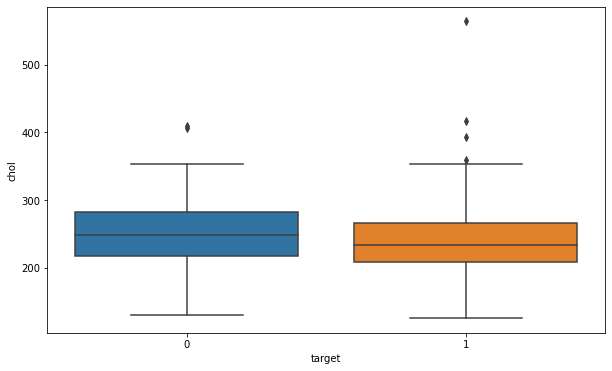

In [8]:
sns.boxplot(x="target",y="chol", data=df );

In [9]:
df = df[df.chol != 564]

In [10]:
df = df[df.ca != 4]

In [11]:
df.shape

(297, 14)

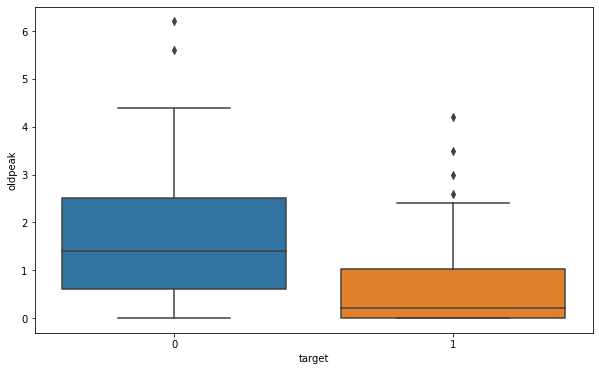

In [12]:
sns.boxplot(x="target",y="oldpeak", data=df );

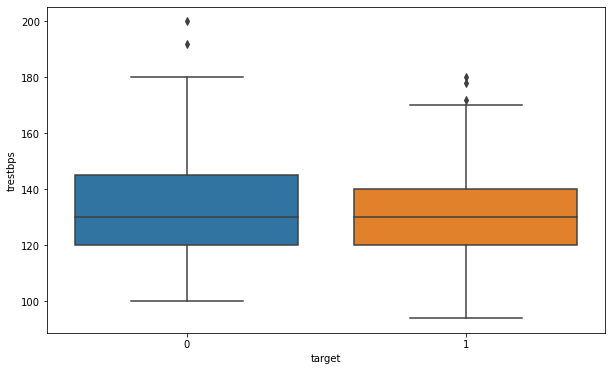

In [13]:
sns.boxplot(x="target",y="trestbps", data=df );

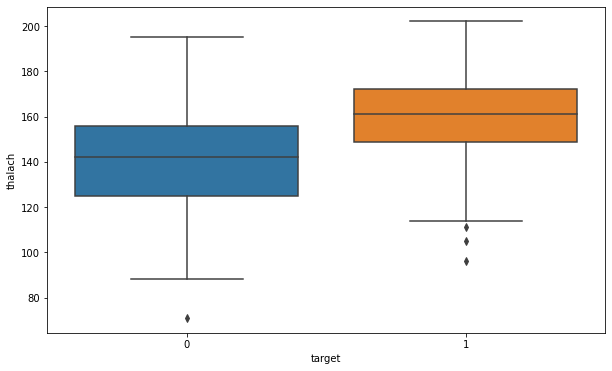

In [14]:
sns.boxplot(x="target",y="thalach", data=df );

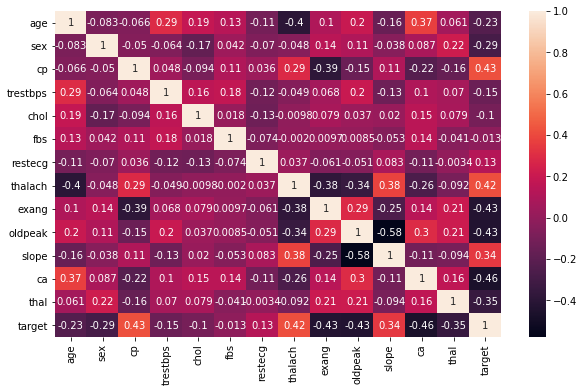

In [15]:
sns.heatmap(df.corr(), annot=True);

# Data Preprocessing

In [16]:
X = df.drop('target',axis=1)
y = df['target']

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [19]:
scaler = MinMaxScaler()

In [20]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implement Logistic Regression and Evaluate

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
log_model = LogisticRegression()

In [23]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [24]:
y_pred = log_model.predict(X_test_scaled)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1], dtype=int64)

In [25]:
y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba

array([[0.85115704, 0.14884296],
       [0.87546152, 0.12453848],
       [0.80451903, 0.19548097],
       [0.74450531, 0.25549469],
       [0.03962042, 0.96037958],
       [0.72880071, 0.27119929],
       [0.18157284, 0.81842716],
       [0.4213288 , 0.5786712 ],
       [0.09724784, 0.90275216],
       [0.92071415, 0.07928585],
       [0.4082298 , 0.5917702 ],
       [0.03134562, 0.96865438],
       [0.27000184, 0.72999816],
       [0.46505818, 0.53494182],
       [0.78756526, 0.21243474],
       [0.28950373, 0.71049627],
       [0.90986044, 0.09013956],
       [0.2174978 , 0.7825022 ],
       [0.33977683, 0.66022317],
       [0.0597439 , 0.9402561 ],
       [0.81580757, 0.18419243],
       [0.90663533, 0.09336467],
       [0.97684195, 0.02315805],
       [0.9707456 , 0.0292544 ],
       [0.38268675, 0.61731325],
       [0.41437591, 0.58562409],
       [0.09372324, 0.90627676],
       [0.61882531, 0.38117469],
       [0.24937229, 0.75062771],
       [0.03269877, 0.96730123]])

In [26]:
test_data = pd.concat([X_test, y_test], axis=1)

In [27]:
test_data["pred_proba"] = y_pred_proba[:,1]

In [28]:
test_data["pred"] = y_pred
test_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred_proba,pred
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0,0.148843,0
276,58,1,0,146,218,0,1,105,0,2.0,1,1,3,0,0.124538,0
192,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0,0.195481,0
275,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,0.255495,0
136,60,0,2,120,178,1,1,96,0,0.0,2,0,2,1,0.960380,1
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0,0.271199,0
12,49,1,1,130,266,0,1,171,0,0.6,2,0,2,1,0.818427,1
172,58,1,1,120,284,0,0,160,0,1.8,1,0,2,0,0.578671,1
149,42,1,2,130,180,0,1,150,0,0.0,2,0,2,1,0.902752,1
206,59,1,0,110,239,0,0,142,1,1.2,1,1,3,0,0.079286,0


In [29]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

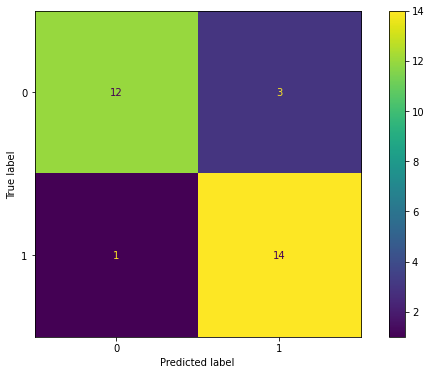

In [30]:
plot_confusion_matrix(log_model, X_test_scaled, y_test);

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.82      0.93      0.87        15

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30



In [32]:
# cross validation

from sklearn.model_selection import cross_val_score, cross_validate

In [33]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [34]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted
1,0.015632,0.000000,0.925926,0.935185,0.925926,0.925309
2,0.015614,0.000000,0.777778,0.777778,0.777778,0.777778
3,0.000000,0.000000,0.777778,0.798246,0.777778,0.768627
4,0.015632,0.000000,0.777778,0.780392,0.777778,0.774621
5,0.000000,0.000000,0.703704,0.703268,0.703704,0.699495
6,0.015621,0.000000,0.777778,0.777778,0.777778,0.777778
7,0.000000,0.015622,0.962963,0.965278,0.962963,0.962755
8,0.000000,0.000000,0.923077,0.934066,0.923077,0.923077
9,0.015621,0.000000,0.846154,0.852885,0.846154,0.844289
10,0.000000,0.015621,0.884615,0.886247,0.884615,0.884096


In [35]:
df_scores.mean()[2:]

test_accuracy              0.835755
test_precision_weighted    0.841112
test_recall_weighted       0.835755
test_f1_weighted           0.833783
dtype: float64

In [36]:
# ROC AND AUC CURVE

In [37]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve

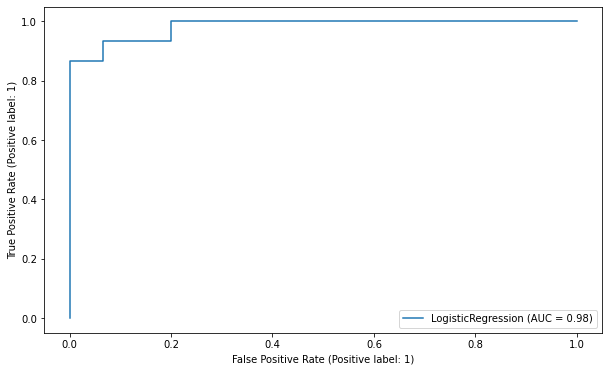

In [38]:
plot_roc_curve(log_model, X_test_scaled, y_test, response_method='auto');

In [39]:
fp_rate, tp_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])

In [40]:
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.6173132453882476

In [41]:
roc_curve = {"fp_rate":fp_rate, "tp_rate":tp_rate, "thresholds":thresholds}
df_roc_curve = pd.DataFrame(roc_curve)
df_roc_curve

,fp_rate,tp_rate,thresholds
0,0.000000,0.000000,1.968654
1,0.000000,0.066667,0.968654
2,0.000000,0.866667,0.617313
3,0.066667,0.866667,0.591770
4,0.066667,0.933333,0.585624
5,0.200000,0.933333,0.534942
6,0.200000,1.000000,0.381175
7,1.000000,1.000000,0.023158


In [42]:
df_roc_curve.iloc[optimal_idx]

fp_rate       0.000000
tp_rate       0.866667
thresholds    0.617313
Name: 2, dtype: float64

In [43]:
test_data["pred2"] = test_data["pred_proba"].apply(lambda x : 1 if x >= optimal_threshold else 0)

In [44]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[12  3]
 [ 1 14]]
              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.82      0.93      0.87        15

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30



In [45]:
y_pred2 = test_data["pred2"]

In [46]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[15  0]
 [ 2 13]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       1.00      0.87      0.93        15

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



# Implement KNN and Evaluate

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
knn_model = KNeighborsClassifier(n_neighbors=5) 

In [49]:
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [50]:
y_pred = knn_model.predict(X_test_scaled)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1], dtype=int64)

In [51]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)

In [52]:
pd.DataFrame(y_pred_proba)

,0,1
0,0.8,0.2
1,0.8,0.2
2,0.8,0.2
3,0.8,0.2
4,0.2,0.8
5,0.6,0.4
6,0.0,1.0
7,0.4,0.6
8,0.2,0.8
9,1.0,0.0


In [53]:
my_dict = {"Actual": y_test, "Pred":y_pred, "Proba_1":y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}
pd.DataFrame.from_dict(my_dict).sample(10)

,Actual,Pred,Proba_1,Proba_0
16,1,1,1.0,0.0
4,1,0,0.2,0.8
39,1,1,1.0,0.0
166,0,0,0.0,1.0
136,1,1,0.8,0.2
149,1,1,0.8,0.2
13,1,1,0.8,0.2
81,1,1,1.0,0.0
167,0,0,0.2,0.8
240,0,0,0.2,0.8


In [54]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[13  2]
 [ 3 12]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        15
           1       0.86      0.80      0.83        15

    accuracy                           0.83        30
   macro avg       0.83      0.83      0.83        30
weighted avg       0.83      0.83      0.83        30



In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
k_values= range(1,30)
param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform', "distance"]}
knn_grid_model = GridSearchCV(knn_model, param_grid, cv=10, scoring= 'accuracy')

In [57]:
knn_grid_model.fit(X_train_scaled, y_train)
knn_grid_model.best_params_

{'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}

In [58]:
# K = 3
knn = KNeighborsClassifier(n_neighbors=3, p =1)

knn.fit(X_train_scaled,y_train)
pred = knn.predict(X_test_scaled)

print('WITH K=3')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

WITH K=3


[[13  2]
 [ 3 12]]


              precision    recall  f1-score   support

           0       0.81      0.87      0.84        15
           1       0.86      0.80      0.83        15

    accuracy                           0.83        30
   macro avg       0.83      0.83      0.83        30
weighted avg       0.83      0.83      0.83        30



# Implement SVM and Evaluate

In [59]:
from sklearn.svm import SVC

In [62]:
svm = SVC()
param_grid = {'C':[0.01,0.1,1,10,1000],
              'kernel':['linear','rbf','sigmoid','poly'],
              'gamma':["scale", "auto"],
              'degree':[1,2]}
grid = GridSearchCV(svm,param_grid,verbose=3, refit=True)

In [63]:
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV 1/5] END ...C=0.01, degree=1, gamma=scale, kernel=linear; total time=   0.0s
[CV 2/5] END ...C=0.01, degree=1, gamma=scale, kernel=linear; total time=   0.0s
[CV 3/5] END ...C=0.01, degree=1, gamma=scale, kernel=linear; total time=   0.0s
[CV 4/5] END ...C=0.01, degree=1, gamma=scale, kernel=linear; total time=   0.0s
[CV 5/5] END ...C=0.01, degree=1, gamma=scale, kernel=linear; total time=   0.0s
[CV 1/5] END ......C=0.01, degree=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV 2/5] END ......C=0.01, degree=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV 3/5] END ......C=0.01, degree=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV 4/5] END ......C=0.01, degree=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV 5/5] END ......C=0.01, degree=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV 1/5] END ..C=0.01, degree=1, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV 2/5] END ..C=0.01, degree=1, gamma=scale, k

[CV 3/5] END ...C=0.1, degree=2, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV 4/5] END ...C=0.1, degree=2, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV 5/5] END ...C=0.1, degree=2, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV 1/5] END ......C=0.1, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV 2/5] END ......C=0.1, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV 3/5] END ......C=0.1, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV 4/5] END ......C=0.1, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV 5/5] END ......C=0.1, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV 1/5] END .....C=0.1, degree=2, gamma=auto, kernel=linear; total time=   0.0s
[CV 2/5] END .....C=0.1, degree=2, gamma=auto, kernel=linear; total time=   0.0s
[CV 3/5] END .....C=0.1, degree=2, gamma=auto, kernel=linear; total time=   0.0s
[CV 4/5] END .....C=0.1, degree=2, gamma=auto, kernel=linear; total time=   0.0s
[CV 5/5] END .....C=0.1, deg

[CV 1/5] END .....C=10, degree=1, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV 2/5] END .....C=10, degree=1, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV 3/5] END .....C=10, degree=1, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV 4/5] END .....C=10, degree=1, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV 5/5] END .....C=10, degree=1, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV 1/5] END ........C=10, degree=1, gamma=auto, kernel=poly; total time=   0.0s
[CV 2/5] END ........C=10, degree=1, gamma=auto, kernel=poly; total time=   0.0s
[CV 3/5] END ........C=10, degree=1, gamma=auto, kernel=poly; total time=   0.0s
[CV 4/5] END ........C=10, degree=1, gamma=auto, kernel=poly; total time=   0.0s
[CV 5/5] END ........C=10, degree=1, gamma=auto, kernel=poly; total time=   0.0s
[CV 1/5] END .....C=10, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV 2/5] END .....C=10, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV 3/5] END .....C=10, degr

[CV 4/5] END .....C=1000, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV 5/5] END .....C=1000, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV 1/5] END ....C=1000, degree=2, gamma=auto, kernel=linear; total time=   0.0s
[CV 2/5] END ....C=1000, degree=2, gamma=auto, kernel=linear; total time=   0.0s
[CV 3/5] END ....C=1000, degree=2, gamma=auto, kernel=linear; total time=   0.0s
[CV 4/5] END ....C=1000, degree=2, gamma=auto, kernel=linear; total time=   0.1s
[CV 5/5] END ....C=1000, degree=2, gamma=auto, kernel=linear; total time=   0.0s
[CV 1/5] END .......C=1000, degree=2, gamma=auto, kernel=rbf; total time=   0.0s
[CV 2/5] END .......C=1000, degree=2, gamma=auto, kernel=rbf; total time=   0.0s
[CV 3/5] END .......C=1000, degree=2, gamma=auto, kernel=rbf; total time=   0.0s
[CV 4/5] END .......C=1000, degree=2, gamma=auto, kernel=rbf; total time=   0.0s
[CV 5/5] END .......C=1000, degree=2, gamma=auto, kernel=rbf; total time=   0.0s
[CV 1/5] END ...C=1000, degr

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 1000], 'degree': [1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'sigmoid', 'poly']},
             verbose=3)

In [65]:
grid.best_params_

{'C': 1000, 'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}

In [66]:
grid.best_estimator_

SVC(C=1000, degree=1, kernel='linear')

In [67]:
y_pred = grid.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12  3]
 [ 0 15]]
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       0.83      1.00      0.91        15

    accuracy                           0.90        30
   macro avg       0.92      0.90      0.90        30
weighted avg       0.92      0.90      0.90        30



# Visually compare models based on your chosen metric

# Chose best model and make a random prediction 